In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os

In [2]:
train_df=pd.read_csv('Datasets/chinese-traffic-signs/annotations.csv')

In [3]:
train_df.head()

,file_name,width,height,x1,y1,x2,y2,category
0,000_0001.png,134,128,19,7,120,117,0
1,000_0002.png,165,151,23,12,149,138,0
2,000_0003.png,128,122,22,14,116,105,0
3,000_0010.png,80,73,14,8,67,63,0
4,000_0011.png,186,174,36,15,155,157,0


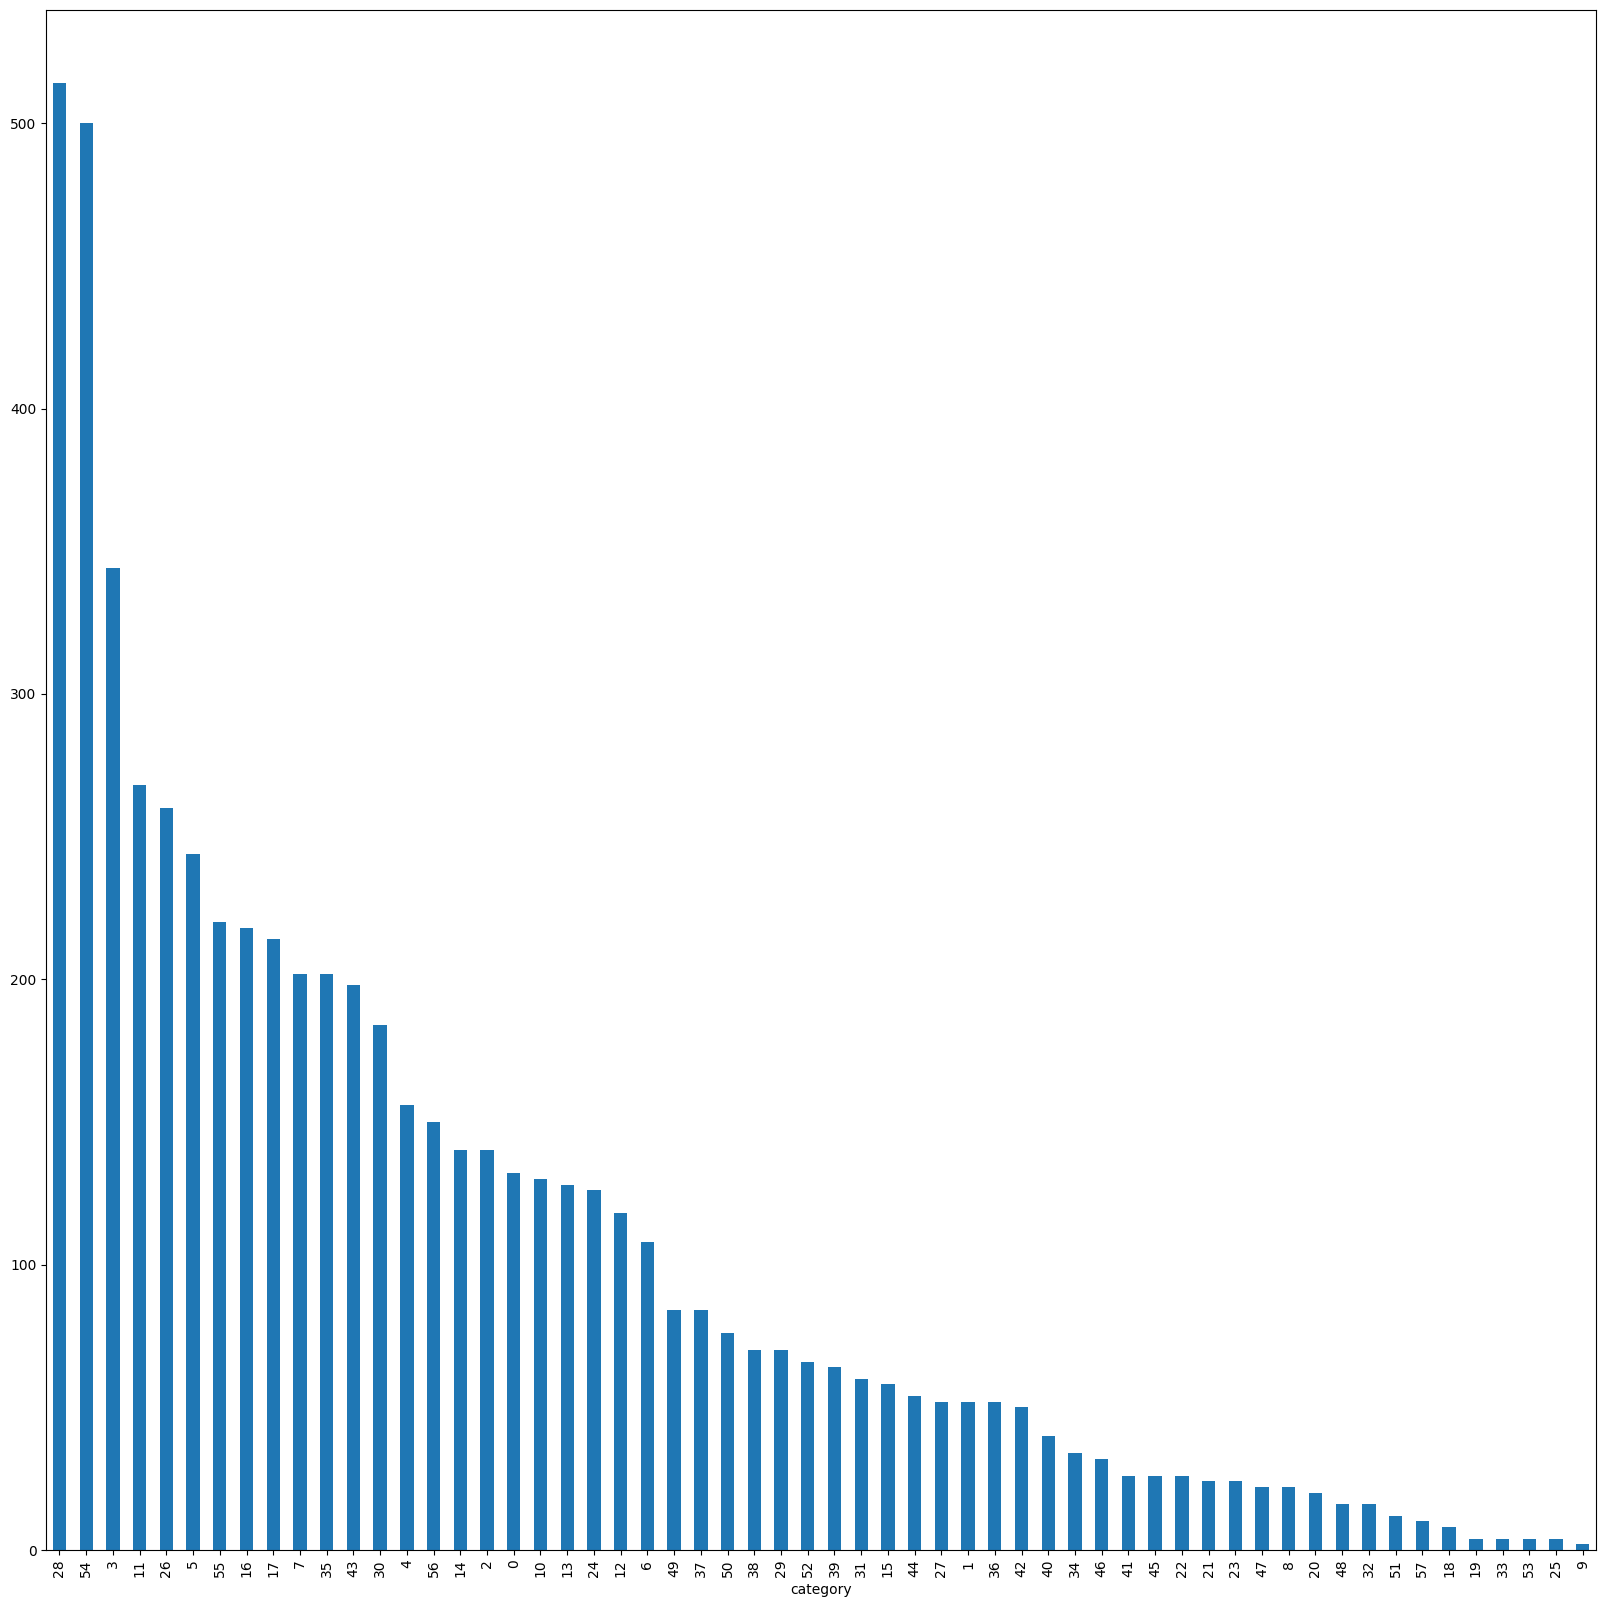

In [4]:
plt.figure(figsize=(20,20))
train_df['category'].value_counts().plot(kind='bar')
plt.show()

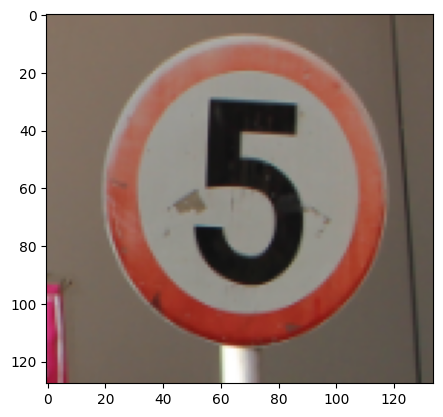

In [5]:
path='Datasets/chinese-traffic-signs/images/000_0001.png'
img=plt.imread(path)
plt.imshow(img)

In [6]:
img.shape

(128, 134, 3)

In [7]:
train_df['category'] = train_df['category'].astype('str')

In [8]:
from keras.applications.mobilenet_v2 import  preprocess_input
datagen = tf.keras.preprocessing.image.ImageDataGenerator(

            preprocessing_function=preprocess_input,
            validation_split=0.1,
            featurewise_center=False,
            featurewise_std_normalization=False,
            rotation_range=15,
            width_shift_range=0.2,
            height_shift_range=0.2,
            horizontal_flip=True

            )

In [9]:
# Train generator
train_generator = datagen.flow_from_dataframe(
            dataframe=train_df,
            directory="Datasets/chinese-traffic-signs/images",
            x_col="file_name",
            y_col="category",
            has_ext=False,
            subset="training",
            batch_size=16,
            seed=42,
            shuffle=True,
            class_mode="categorical",
            target_size=(224,244))
print('Train generator created')

Found 5548 validated image filenames belonging to 58 classes.
Train generator created


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


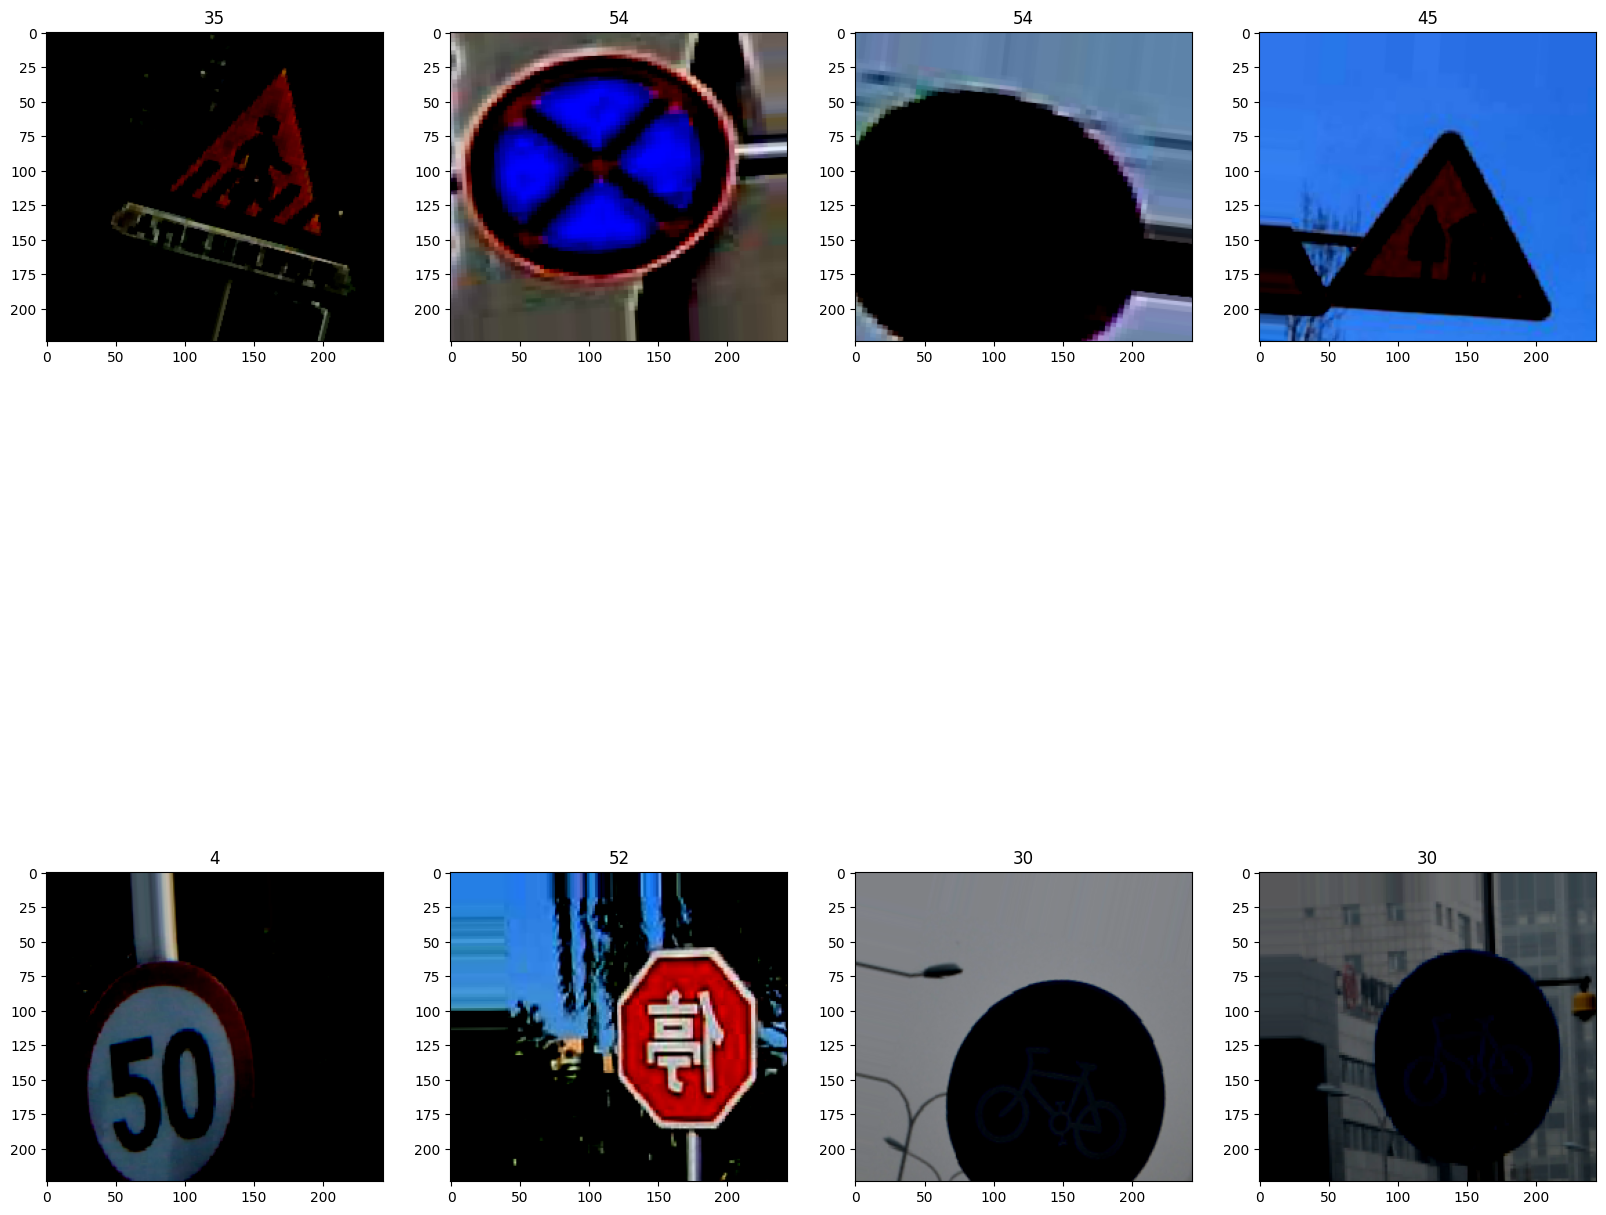

In [10]:
classes=list(train_generator.class_indices.keys())
plt.figure(figsize=(20,20))
for X_batch, y_batch in train_generator:
    # create a grid of 3x3 images
    for i in range(0,8):
        plt.subplot(2,4,i+1)
        plt.imshow(X_batch[i])
        plt.title(classes[np.where(y_batch[i]==1)[0][0]])
    # show the plot
    plt.show()
    break

In [11]:
from keras.applications.mobilenet_v2 import  preprocess_input
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
            
            preprocessing_function=preprocess_input,
            validation_split=0.1,
            
            )

In [12]:
# Validation generator
val_generator = datagen.flow_from_dataframe(
            dataframe=train_df,
            directory='Datasets/chinese-traffic-signs/images',
            x_col="file_name",
            y_col="category",
            has_ext=False,
            subset="validation",
            batch_size=16,
            seed=42,
            shuffle=False,
            class_mode="categorical",
            target_size=(224,224))

Found 616 validated image filenames belonging to 58 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


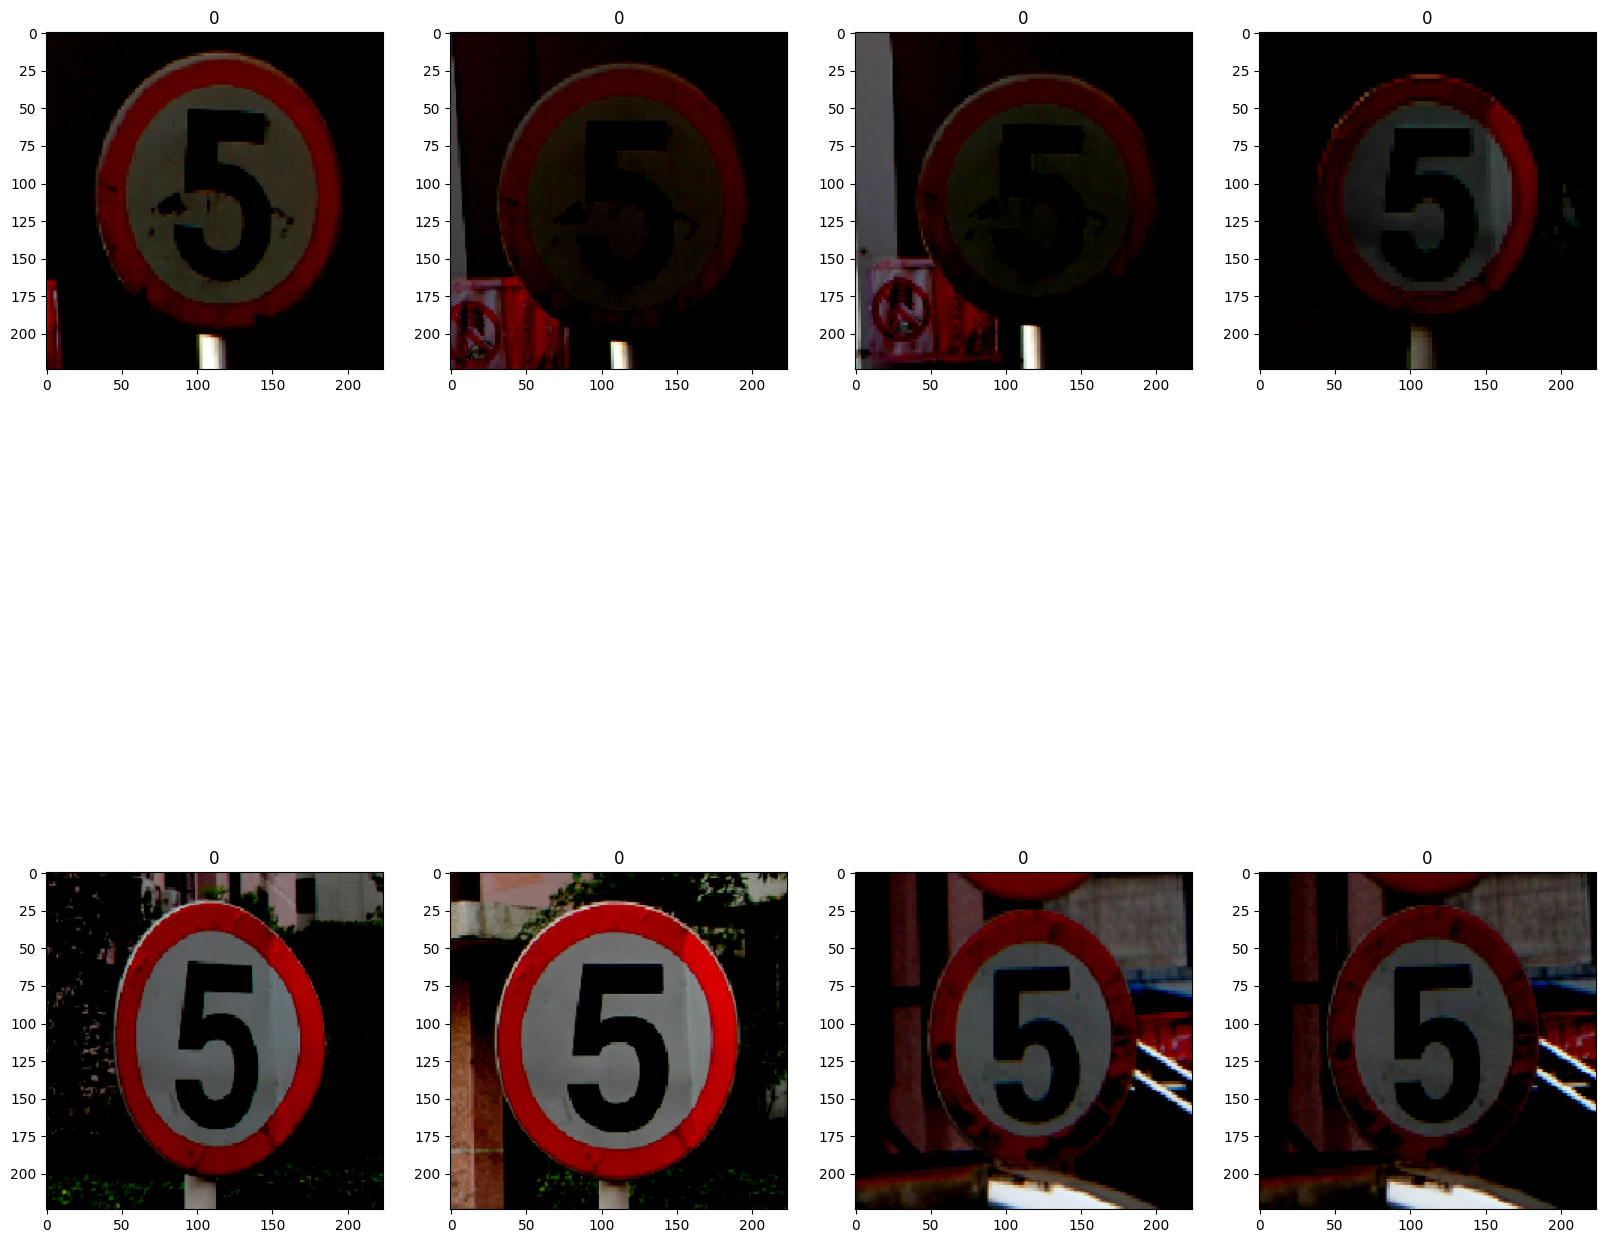

In [13]:
classes=list(train_generator.class_indices.keys())
plt.figure(figsize=(20,20))
for X_batch, y_batch in val_generator:
    # create a grid of 3x3 images
    for i in range(0,8):
        plt.subplot(2,4,i+1)
        plt.imshow(X_batch[i])
        plt.title(classes[np.where(y_batch[i]==1)[0][0]])
    # show the plot
    plt.show()
    break

In [14]:
len(classes)

58

In [15]:
from tensorflow.keras.models import load_model

# load the saved model
model = load_model('model checkpoint/Trafic_sign (96%).hdf5')

In [16]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense ,Flatten ,Conv2D ,MaxPooling2D ,Dropout ,BatchNormalization
# from tensorflow.keras.optimizers import Adam 
# from tensorflow.keras.callbacks import EarlyStopping ,ReduceLROnPlateau ,ModelCheckpoint

In [17]:
# optimizer=Adam(learning_rate=0.0006,beta_1=0.9,beta_2=0.99)

In [18]:
# EarlyStop=EarlyStopping(patience=10,restore_best_weights=True)
# Reduce_LR=ReduceLROnPlateau(monitor='val_accuracy',verbose=2,factor=0.5,min_lr=0.00001)
# model_check=ModelCheckpoint('Trafic_sign.hdf5',monitor='val_loss',verbose=1,save_best_only=True)
# callback=[EarlyStop , Reduce_LR, model_check]

In [19]:
# from keras.applications.mobilenet_v2 import MobileNetV2
# mb=MobileNetV2(include_top=False,input_shape=(224,224,3),weights='imagenet')

In [20]:
# mb.trainable=False

In [21]:
# model = Sequential()
# model.add(mb)
# model.add(Flatten())
# model.add(Dense(units = 512 , activation = 'relu'))
# model.add(BatchNormalization())
# model.add(Dense(units = 1024 , activation = 'relu'))
# model.add(BatchNormalization())
# model.add(Dense(units = 512 , activation = 'relu'))
# model.add(BatchNormalization())
# model.add(Dense(units = 58 , activation = 'softmax'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
 dense (Dense)               (None, 512)               32113152  
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 1024)              525312    
                                                                 
 batch_normalization_1 (Bat  (None, 1024)              4

In [23]:
# model.compile(optimizer=optimizer,loss='categorical_crossentropy', metrics=["accuracy"])

In [24]:
# history=model.fit(train_generator,validation_data=val_generator,epochs=100,batch_size=16,
#                   steps_per_epoch=len(train_generator)//16,validation_steps=len(val_generator)//16,
#                   callbacks=callback, verbose=1)

Epoch 1/100
21/21 [==============================] - ETA: 0s - loss: 3.1687 - accuracy: 0.3423
Epoch 1: val_loss improved from inf to 6.65082, saving model to Trafic_sign.hdf5


C:\Users\Joseph Tee\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


21/21 [==============================] - 25s 880ms/step - loss: 3.1687 - accuracy: 0.3423 - val_loss: 6.6508 - val_accuracy: 0.0000e+00 - lr: 6.0000e-04
Epoch 2/100
21/21 [==============================] - ETA: 0s - loss: 2.0295 - accuracy: 0.4851
Epoch 2: val_loss improved from 6.65082 to 2.18868, saving model to Trafic_sign.hdf5
21/21 [==============================] - 16s 741ms/step - loss: 2.0295 - accuracy: 0.4851 - val_loss: 2.1887 - val_accuracy: 0.4062 - lr: 6.0000e-04
Epoch 3/100
21/21 [==============================] - ETA: 0s - loss: 1.5532 - accuracy: 0.6131
Epoch 3: val_loss did not improve from 2.18868
21/21 [==============================] - 14s 683ms/step - loss: 1.5532 - accuracy: 0.6131 - val_loss: 4.7614 - val_accuracy: 0.0000e+00 - lr: 6.0000e-04
Epoch 4/100
21/21 [==============================] - ETA: 0s - loss: 1.3291 - accuracy: 0.6458
Epoch 4: val_loss improved from 2.18868 to 2.09042, saving model to Trafic_sign.hdf5
21/21 [==============================] - 15

21/21 [==============================] - ETA: 0s - loss: 0.1476 - accuracy: 0.9494
Epoch 54: val_loss did not improve from 0.03118
21/21 [==============================] - 14s 652ms/step - loss: 0.1476 - accuracy: 0.9494 - val_loss: 0.0338 - val_accuracy: 1.0000 - lr: 3.7500e-05
Epoch 55/100
21/21 [==============================] - ETA: 0s - loss: 0.1812 - accuracy: 0.9435
Epoch 55: val_loss improved from 0.03118 to 0.02852, saving model to Trafic_sign.hdf5
21/21 [==============================] - 15s 719ms/step - loss: 0.1812 - accuracy: 0.9435 - val_loss: 0.0285 - val_accuracy: 1.0000 - lr: 3.7500e-05
Epoch 56/100
21/21 [==============================] - ETA: 0s - loss: 0.1250 - accuracy: 0.9673
Epoch 56: val_loss improved from 0.02852 to 0.02533, saving model to Trafic_sign.hdf5
21/21 [==============================] - 15s 705ms/step - loss: 0.1250 - accuracy: 0.9673 - val_loss: 0.0253 - val_accuracy: 1.0000 - lr: 3.7500e-05
Epoch 57/100
21/21 [==============================] - ETA:

In [23]:
loss,acc=model.evaluate(val_generator)

39/39 [==============================] - 12s 312ms/step - loss: 0.1306 - accuracy: 0.9692


In [17]:
import pickle

# # After training your model, save the history
# with open('model_history.pkl', 'wb') as file:
#     pickle.dump(history.history, file)

# Open the file for reading
with open('model (96%)_history.pkl', 'rb') as file:
    history = pickle.load(file)

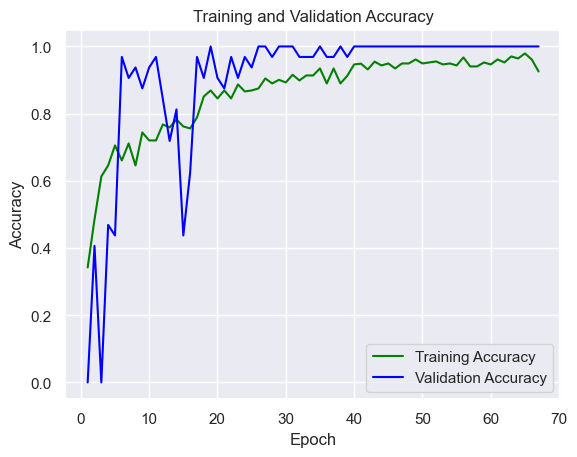

<Figure size 640x480 with 0 Axes>

In [21]:
#plotting training values
import seaborn as sns
sns.set()

# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']
# loss = history.history['loss']
# val_loss = history.history['val_loss']
# epochs = range(1, len(loss) + 1)

# Only use this after loading training history file
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.savefig('Training and Validation Accuracy.png')
plt.figure()
plt.show()

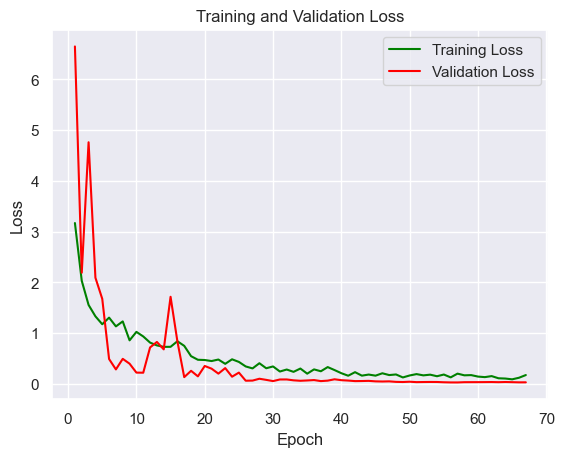

In [22]:
#loss plot
plt.plot(epochs, loss, color='green', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig('Training and Validation Loss.png')
plt.show()

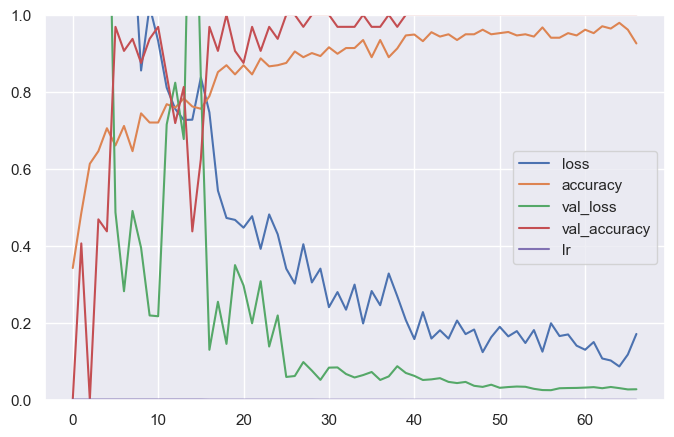

In [26]:
# pd.DataFrame(history.history).plot(figsize=(8, 5))

# Only use this after loading training history file
pd.DataFrame(history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.savefig('Graph summary.png')
plt.show()

In [24]:
predictions = model.predict(val_generator)

39/39 [==============================] - 12s 307ms/step


In [25]:
from sklearn.metrics import classification_report
print(classification_report(val_generator.classes, predictions.argmax(axis=1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       0.88      1.00      0.94        15
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00        11
           6       1.00      1.00      1.00        40
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00        16
           9       1.00      1.00      1.00        40
          10       1.00      0.67      0.80         3
          11       0.00      0.00      0.00         2
          12       1.00      0.94      0.97        32
          13       1.00      1.00      1.00         6
          14       1.00      1.00      1.00         4
          15       1.00      1.00      1.00         6
          16       1.00      0.50      0.67         4
          17       0.94    

C:\Users\Joseph Tee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Joseph Tee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Joseph Tee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

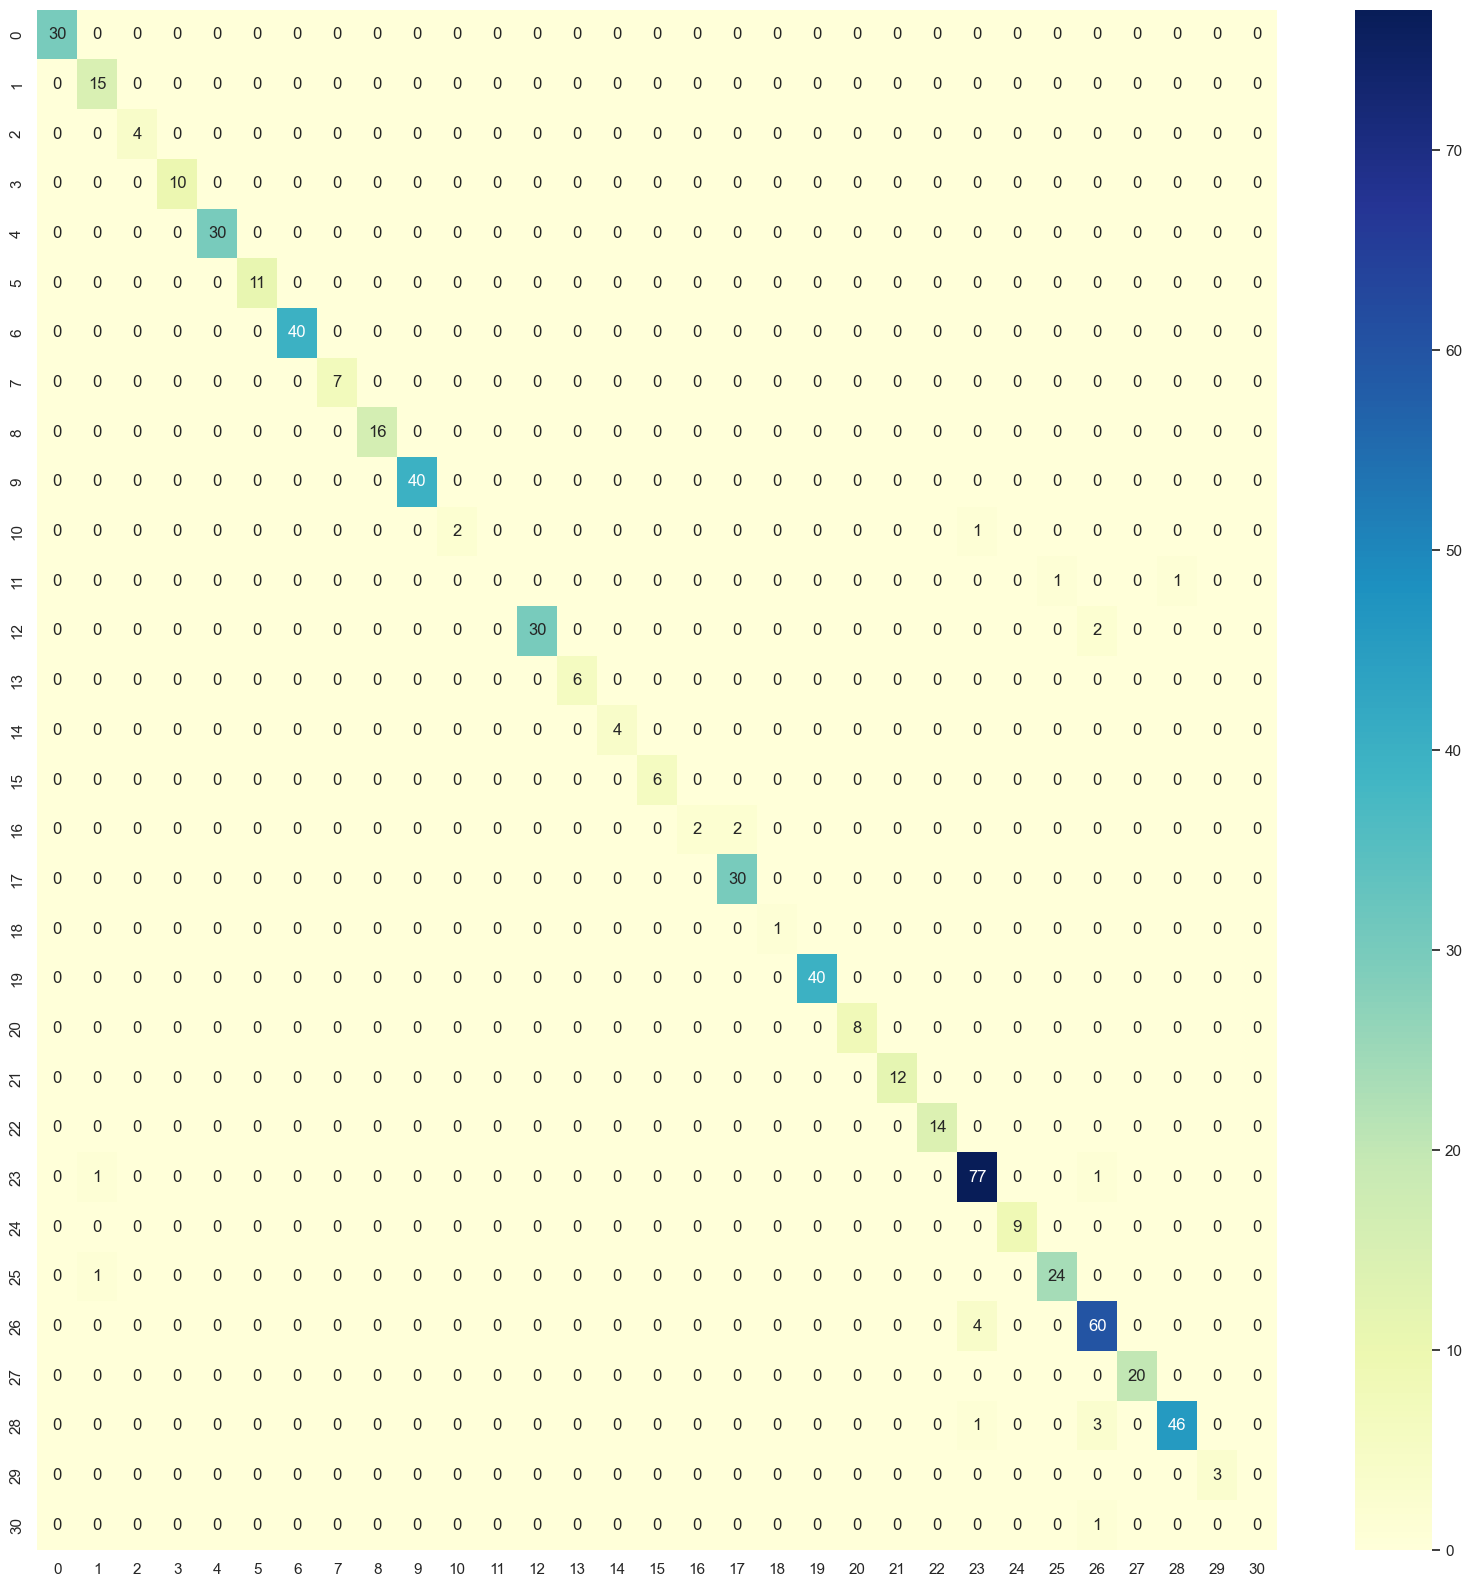

In [29]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(val_generator.classes, predictions.argmax(axis=1))
plt.figure(figsize=(20,20))
sns.heatmap(cm,  annot=True, fmt="d" ,cmap="YlGnBu")
# Save the heatmap as a PNG image
plt.savefig('confusion_matrix.png')
# Show the plot (optional)
plt.show()

1/1 [==============================] - 0s 343ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


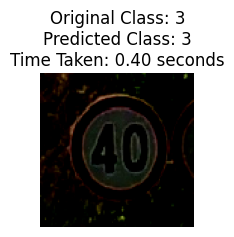

1/1 [==============================] - 0s 329ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


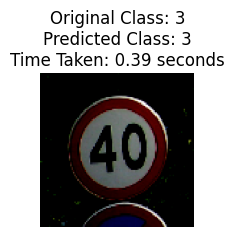

1/1 [==============================] - 0s 372ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


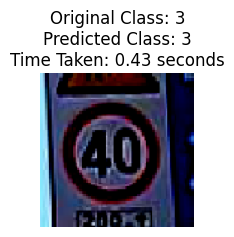

1/1 [==============================] - 0s 340ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


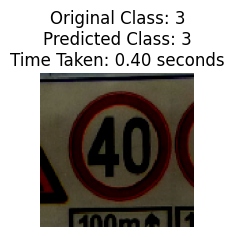

1/1 [==============================] - 0s 359ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


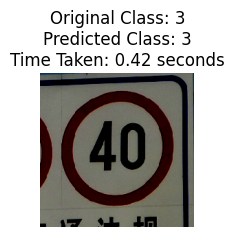

1/1 [==============================] - 0s 374ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


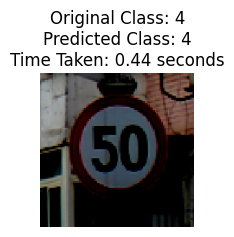

1/1 [==============================] - 0s 380ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


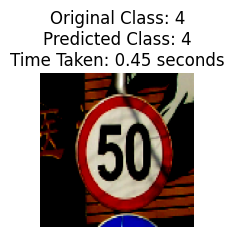

1/1 [==============================] - 0s 348ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


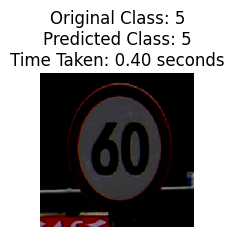

1/1 [==============================] - 0s 417ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


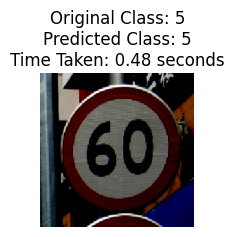

1/1 [==============================] - 0s 351ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


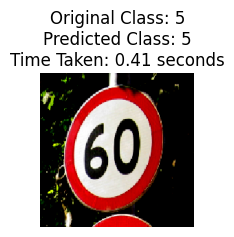

1/1 [==============================] - 0s 381ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


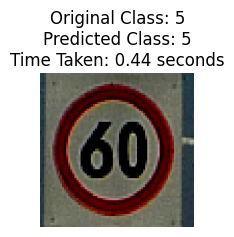

1/1 [==============================] - 0s 325ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


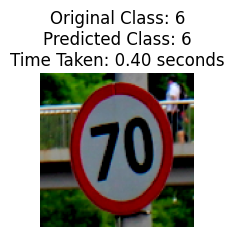

1/1 [==============================] - 0s 337ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


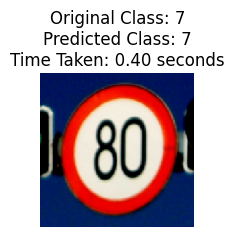

1/1 [==============================] - 0s 324ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


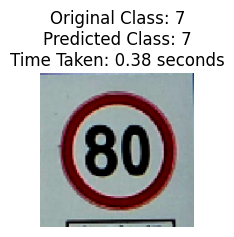

1/1 [==============================] - 0s 334ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


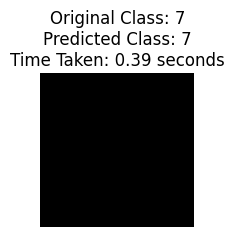

1/1 [==============================] - 0s 333ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


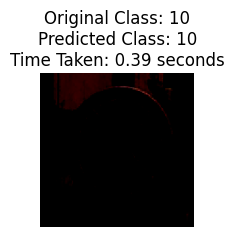

1/1 [==============================] - 0s 345ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


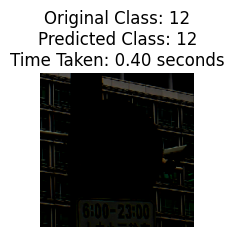

1/1 [==============================] - 0s 341ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


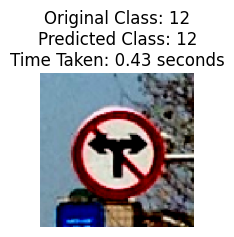

1/1 [==============================] - 0s 381ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


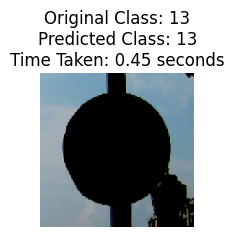

1/1 [==============================] - 0s 345ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


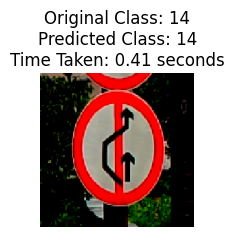

1/1 [==============================] - 0s 347ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


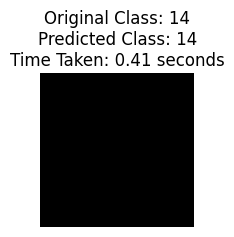

1/1 [==============================] - 0s 356ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


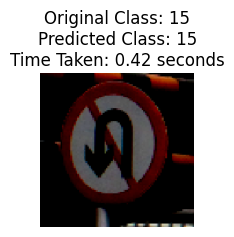

1/1 [==============================] - 0s 336ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


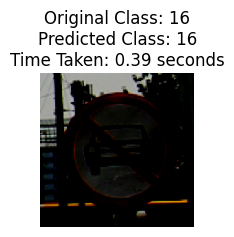

1/1 [==============================] - 0s 345ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


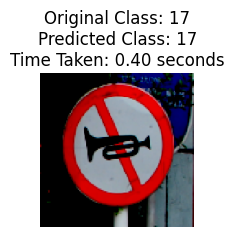

1/1 [==============================] - 0s 351ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


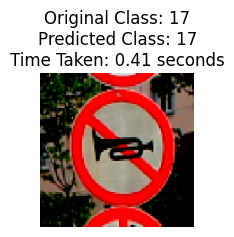

1/1 [==============================] - 0s 383ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


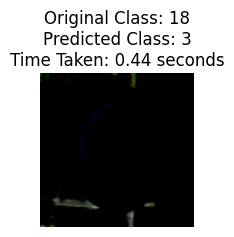

1/1 [==============================] - 0s 371ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


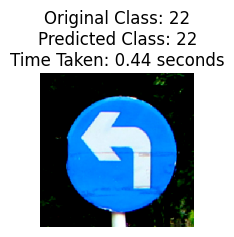

1/1 [==============================] - 0s 381ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


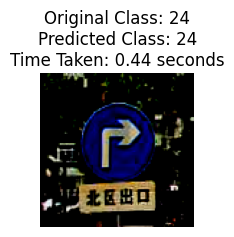

1/1 [==============================] - 0s 363ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


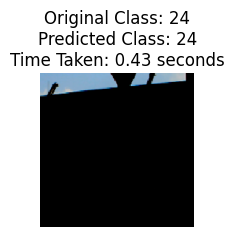

1/1 [==============================] - 0s 354ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


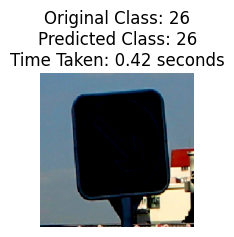

In [30]:
import time

# Create a list to store the class labels
class_labels = list(val_generator.class_indices.keys())

# Define the number of images you want to display
num_images_to_display = 30

# Get a batch of validation data and make predictions
for i in range(num_images_to_display):
    X_batch, y_batch = next(val_generator)
    
    # Record the start time
    start_time = time.time()
    
    # Make predictions
    predictions = model.predict(X_batch)
    
    # Get the predicted class index
    predicted_class_index = np.argmax(predictions, axis=1)[-1]
    
    # Get the original class index
    original_class_index = np.argmax(y_batch, axis=1)[-1]
    
    # Get the original image
    original_image = X_batch[-1]
    
    # Calculate the time taken for prediction
    end_time = time.time()
    time_taken = end_time - start_time
    
    # Display the original image, original class, predicted class, and time taken
    plt.figure(figsize=(2, 2))
    plt.imshow(original_image)
    plt.title(f"Original Class: {class_labels[original_class_index]}\nPredicted Class: {class_labels[predicted_class_index]}\nTime Taken: {time_taken:.2f} seconds")
    plt.axis('off')
    plt.show()